In [1]:
import pandas as pd
import numpy as np

In [2]:
sales1 = pd.read_csv('sales_data_1.csv')
sales1.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [3]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Customer          70 non-null     object 
 4   Selling price     70 non-null     float64
 5   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ KB


In [4]:
# What is their overall gross margin for their business?
sum((sales1['Selling price'] - sales1['Buying price']) * sales1['Quantity sold'])

31482.749999999985

In [5]:
# Which vendor is the most profitable?
df = sales1.copy()
df['Profit'] = (sales1['Selling price'] - sales1['Buying price']) * sales1['Quantity sold']
vendor_profit = df.groupby('Firm bought from').agg({'Profit' : ['sum']}).reset_index()
vendor_profit.columns=['Firm bought from', 'Profit_sum']
vendor_profit.sort_values(by=['Profit_sum'], ascending = False).iloc[0]

Firm bought from    Vendor4
Profit_sum          6903.31
Name: 4, dtype: object

In [6]:
# Which customer is the least profitable?
df = sales1.copy()
df['Profit'] = (sales1['Selling price'] - sales1['Buying price']) * sales1['Quantity sold']
customer_profit = df.groupby('Customer').agg({'Profit' : ['sum']}).reset_index()
customer_profit.columns=['Customer', 'Profit_sum']
customer_profit.sort_values(by=['Profit_sum'], ascending = True).iloc[0]

Customer      Customer3
Profit_sum      1055.05
Name: 3, dtype: object

In [7]:
# Which day of the week was most profitable for them?
df = sales1.copy()
df['Profit'] = (sales1['Selling price'] - sales1['Buying price']) * sales1['Quantity sold']
daily_profit = df.groupby('Date').agg({'Profit' : ['sum']}).reset_index()
daily_profit.columns=['Date', 'Profit_sum']
daily_profit.sort_values(by=['Profit_sum'], ascending = False).iloc[0]

Date          21/08/23
Profit_sum     6847.34
Name: 0, dtype: object

In [8]:
# Which day of the week was the least profitable for them?
daily_profit.sort_values(by=['Profit_sum'], ascending = True).iloc[0]

Date          27/08/23
Profit_sum     3086.46
Name: 6, dtype: object

In [9]:
sales2 = pd.read_csv('sales_data_2.csv')
sales2.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [10]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Quantity bought   70 non-null     int64  
 4   Customer          70 non-null     object 
 5   Selling price     70 non-null     float64
 6   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [11]:
sales2['Date'].value_counts()

Date
2023-08-21    10
2023-08-22    10
2023-08-23    10
2023-08-24    10
2023-08-25    10
2023-08-26    10
2023-08-27    10
Name: count, dtype: int64

In [12]:
# Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv?
sales2['Profit'] = sales2['Selling price']*sales2['Quantity sold'] - sales2['Buying price']*sales2['Quantity bought']
avg = sales2.groupby('Date').agg({'Profit' : ['sum']}).reset_index()
avg.columns = ['Date', 'Profit']
rolling = pd.DataFrame(zip(sales2['Date'].unique(),avg['Profit'], avg['Profit'].rolling(3).mean()), columns=['Date','Gross Profit', 'Rolling Average'])
rolling

,Date,Gross Profit,Rolling Average
0,2023-08-21,-6280.83,NaN
1,2023-08-22,-12285.39,NaN
2,2023-08-23,-8939.81,-9168.676667
3,2023-08-24,-4778.46,-8667.886667
4,2023-08-25,-10344.47,-8020.913333
5,2023-08-26,-8788.41,-7970.446667
6,2023-08-27,-14616.06,-11249.646667


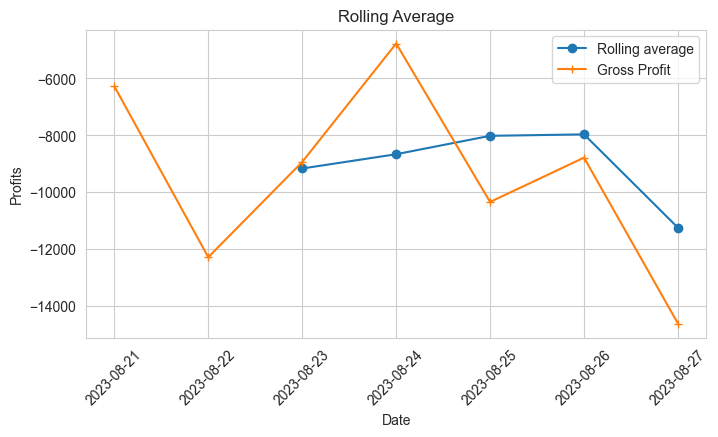

In [13]:
# Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.
import matplotlib.pyplot as plt
plot_dates = pd.to_datetime(rolling['Date'])
profits = rolling['Gross Profit']
avg = rolling['Rolling Average']
plt.figure(figsize=(8,4))
plt.plot(plot_dates, avg, marker = 'o', label = 'Rolling average')
plt.plot(plot_dates, profits, marker = '+' , label = 'Gross Profit')
plt.title('Rolling Average')
plt.xlabel('Date')
plt.ylabel('Profits')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

Overall the company incurs a loss every day. The steap down slope indicates that the company has incured a major loss for the last 3 dates (25-08, 26-08, 27-08)

Text(0.5, 1.0, 'Vendor Gross margin')

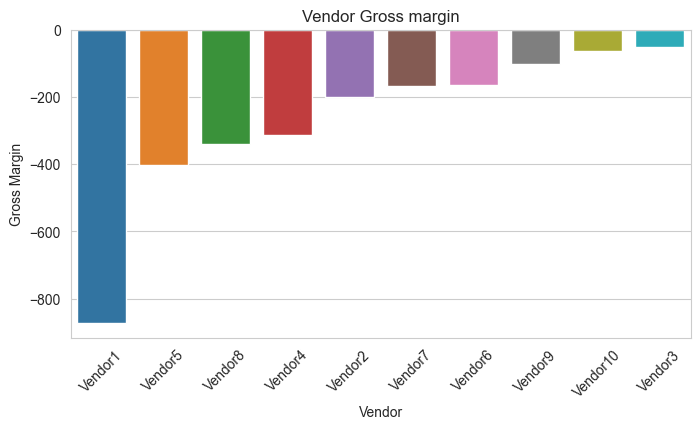

In [14]:
import seaborn as sns
sales2['Gross profit margin'] = sales2['Profit']/(sales2['Selling price']*sales2['Quantity sold'])*100
vendor = sales2.groupby('Firm bought from').agg({'Gross profit margin' : ['mean']}).reset_index()
vendor.columns = ['Vendor', 'Gross Margin']
vendor = vendor.sort_values(by=['Gross Margin'])
plt.figure(figsize=(8,4))
sns.barplot(data = vendor, x = 'Vendor', y = 'Gross Margin')
plt.xticks(rotation = 45)
plt.title('Vendor Gross margin')

Text(0.5, 1.0, 'Vendor Gross margin')

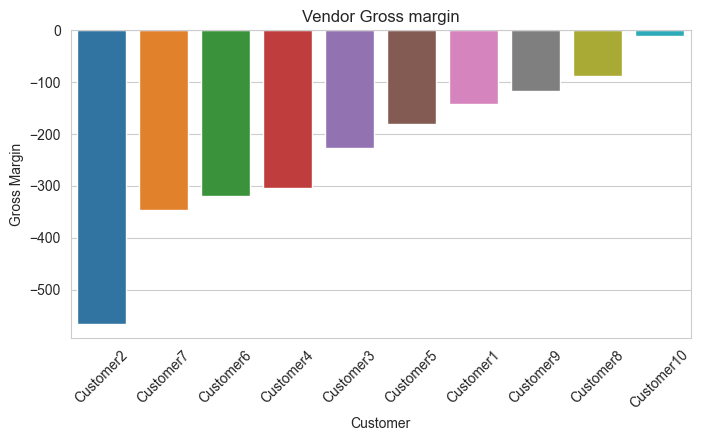

In [15]:
customer = sales2.groupby('Customer').agg({'Gross profit margin' : ['mean']}).reset_index()
customer.columns = ['Customer', 'Gross Margin']
customer = customer.sort_values(by=['Gross Margin'])
plt.figure(figsize=(8,4))
sns.barplot(data = customer, x = 'Customer', y = 'Gross Margin')
plt.xticks(rotation = 45)
plt.title('Vendor Gross margin')

In [16]:
# eliminating vendor 1 and customer 7 and calculating the moving average
removed_sales2 = sales2[(sales2['Firm bought from'] != 'Vendor1') & (sales2['Customer'] != 'Customer7')]
removed_sales2['Profit'] = removed_sales2['Selling price']*removed_sales2['Quantity sold'] - removed_sales2['Buying price']*removed_sales2['Quantity bought']
avg_removed = removed_sales2.groupby('Date').agg({'Profit' : ['sum']}).reset_index()
avg_removed.columns = ['Date', 'Profit']
rolling_removed = pd.DataFrame(zip(removed_sales2['Date'].unique(),avg_removed['Profit'], avg_removed['Profit'].rolling(3).mean()), columns=['Date','Gross Profit', 'Rolling Average'])
rolling_removed

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_24508\2691418481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_sales2['Profit'] = removed_sales2['Selling price']*removed_sales2['Quantity sold'] - removed_sales2['Buying price']*removed_sales2['Quantity bought']


,Date,Gross Profit,Rolling Average
0,2023-08-21,2048.65,NaN
1,2023-08-22,-11053.41,NaN
2,2023-08-23,-2962.96,-3989.240000
3,2023-08-24,2033.52,-3994.283333
4,2023-08-25,-10553.39,-3827.610000
5,2023-08-26,-5046.12,-4521.996667
6,2023-08-27,-11678.54,-9092.683333


we can clearly see that the values are much better when compared to the previous rolling average

In [17]:
# To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

buying = pd.Series(sales2['Buying price'].sort_values())
selling = pd.Series(sales2['Selling price'].sort_values())
pd.DataFrame(zip(buying.quantile([0.25, 0.5, 0.75]), selling.quantile([0.25, 0.5, 0.75])), index=['25th quartile', '50th quartile', '75th quartile'], columns = ['Buying', 'Selling']).T

,25th quartile,50th quartile,75th quartile
Buying,29.900,60.76,78.3200
Selling,38.975,78.99,103.3975


In [18]:
# Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

selling_midrange = [x for x in sales2['Selling price'] if x < 38.975 or x > 103.3975]
buying_midrange = [x for x in sales2['Buying price'] if x < 29.900 or x > 78.3200]

print("buying in nominal range - {0}%".format(round(len(buying_midrange)/len(sales2)*100 ,4)))
print("selling in nominal range - {0}%".format(round(len(selling_midrange)/len(sales2)*100 ,4)))

buying_above_75 = [x for x in sales2['Buying price'] if x > 78.3200]
selling_below_25 = [x for x in sales2['Selling price'] if x < 38.975]

print("Buying above 75th quartile price - {0}%".format(round(len(buying_above_75)/len(sales2)*100, 4)))
print("Selling below 25th quartile price - {0}%".format(round(len(selling_below_25)/len(sales2)*100, 4)))

buying in nominal range - 51.4286%
selling in nominal range - 51.4286%
Buying above 75th quartile price - 25.7143%
Selling below 25th quartile price - 25.7143%


In [19]:
# 11 Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin?

df = sales2.copy()
total_revenue = df["Selling price"].sum()
total_gross_profit = df["Profit"].sum()

original_gross_margin = (total_gross_profit / total_revenue) * 100
print(f"The original gross profit margin is {original_gross_margin:.2f}%.")

df_vendor4 = df[df["Firm bought from"] == "Vendor4"]
vendor4_revenue = df_vendor4["Selling price"].sum()
vendor4_gross_profit = df_vendor4["Profit"].sum()
vendor4_gross_margin = (vendor4_gross_profit / vendor4_revenue) * 100
print(f"The gross profit margin for Vendor 4 is {vendor4_gross_margin:.2f}%.")

new_cogs_vendor4 = df_vendor4["Buying price"].sum() * 1.1 * 1.1
new_gross_profit_vendor4 = vendor4_revenue - new_cogs_vendor4
new_vendor4_gross_margin = (new_gross_profit_vendor4 / vendor4_revenue) * 100
print(f"The new gross profit margin for Vendor 4 is {new_vendor4_gross_margin:.2f}%.")

new_total_gross_profit = total_gross_profit - vendor4_gross_profit + new_gross_profit_vendor4
new_gross_margin = (new_total_gross_profit / total_revenue) * 100
print(f"The new gross profit margin for the whole data is {new_gross_margin:.2f}%.")

difference = original_gross_margin - new_gross_margin
print(f"The difference between the original and the new gross profit margin is {difference:.2f} percentage points.")

The original gross profit margin is -1276.27%.
The gross profit margin for Vendor 4 is -923.92%.
The new gross profit margin for Vendor 4 is 6.77%.
The new gross profit margin for the whole data is -1142.93%.
The difference between the original and the new gross profit margin is -133.34 percentage points.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Vendor1'),
  Text(1, 0, 'Vendor10'),
  Text(2, 0, 'Vendor2'),
  Text(3, 0, 'Vendor3'),
  Text(4, 0, 'Vendor4'),
  Text(5, 0, 'Vendor5'),
  Text(6, 0, 'Vendor6'),
  Text(7, 0, 'Vendor7'),
  Text(8, 0, 'Vendor8'),
  Text(9, 0, 'Vendor9')])

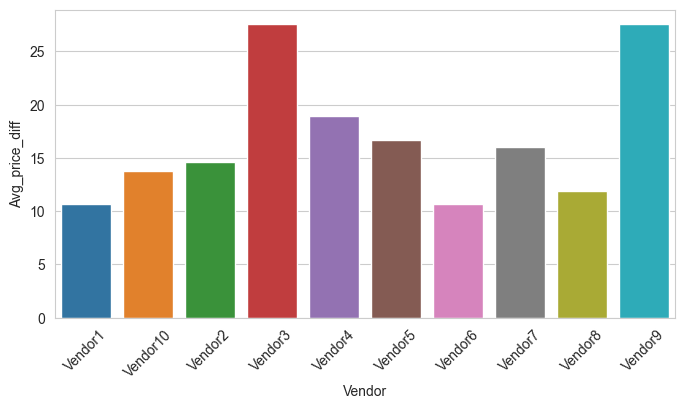

In [20]:
# 12 Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)

sales2['price_diff'] = sales2['Selling price'] - sales2['Buying price']
q12 = sales2.groupby('Firm bought from').agg({'price_diff' : ['mean']}).reset_index()
q12.columns = ['Vendor', 'Avg_price_diff']
plt.figure(figsize=(8,4))
sns.barplot(data = q12, x='Vendor', y='Avg_price_diff')
plt.xticks(rotation = 45)

In [21]:
# getting vendor with max price diff
q12[q12['Avg_price_diff'] == q12['Avg_price_diff'].max()]

,Vendor,Avg_price_diff
9,Vendor9,27.543333


In [22]:
# buying from vendor 9 will give us the maximum gross margin
theoritical_max_margin = sales2['Quantity bought'].sum()*27.543333
theoritical_max_margin

98081.808813

In [24]:
# 13 Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

df = sales2[sales2['Firm bought from'] == "Vendor7"]
df['pct_change_qty'] = df['Quantity sold'].pct_change()
df['pct_change_price'] = df['Selling price'].pct_change()
df['Price Elasticity of Demand'] = df['pct_change_qty'] / df['pct_change_price']
df

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_24508\1192444723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_change_qty'] = df['Quantity sold'].pct_change()
C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_24508\1192444723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_change_price'] = df['Selling price'].pct_change()
C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_24508\1192444723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit,Gross profit margin,price_diff,pct_change_qty,pct_change_price,Price Elasticity of Demand
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,213.52,13.718838,19.83,NaN,NaN,NaN
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,-2772.91,-613.869518,12.52,-0.533333,-0.378084,1.410621
16,2023-08-22,Vendor7,89.79,61,Customer1,111.92,25,-2679.19,-95.753753,22.13,2.571429,0.734387,3.501462
19,2023-08-22,Vendor7,58.42,8,Customer6,68.74,3,-261.14,-126.631752,10.32,-0.880000,-0.385811,2.280908
20,2023-08-23,Vendor7,55.24,45,Customer2,72.22,19,-1113.62,-81.156991,16.98,5.333333,0.050626,105.348659
24,2023-08-23,Vendor7,27.75,22,Customer1,30.86,3,-517.92,-559.429682,3.11,-0.842105,-0.572695,1.470427
32,2023-08-24,Vendor7,26.29,55,Customer10,38.53,55,673.20,31.767454,12.24,17.333333,0.248542,69.740113
35,2023-08-24,Vendor7,93.63,94,Customer7,119.13,23,-6061.23,-221.213581,25.50,-0.581818,2.091876,-0.278132
36,2023-08-24,Vendor7,24.75,20,Customer8,31.49,19,103.31,17.266969,6.74,-0.173913,-0.735667,0.236402
39,2023-08-24,Vendor7,15.42,9,Customer2,22.79,7,20.75,13.006958,7.37,-0.631579,-0.276278,2.286025
